# **Implementación de las hipotesis**

Informe final **Grupo 9**

Jan Polanco\
Keyner Martínez\
Jorge Mora\
Juan Paz

## Conjunto de Datos de Yelp

Pendiente por agregar mas informacion.

### Contenido del Dataset
- **review_id:**
- **user_id:**
- **business_id:**
- **stars:**
- **useful:**
- **funny:**
- **cool:**
- **text:**
- **date:**

Para acceder a la versión más reciente del conjunto de datos proporcionada por IBM, visite el siguiente enlace: [Yelp Dataset](https://javerianacaliedu-my.sharepoint.com/:f:/g/personal/abuss_javerianacali_edu_co/EqgSYnRKWYNEmAwYE7-_-TYBISFAsGx31Etz73geJ1fXxA?e=vQJNLk ).

# Rubrica de evaluación

| Criterios                     | Nivel 1 | Nivel 2 | Nivel 3 | Nivel 4 | Puntuación del criterio |
|-------------------------------|---------|---------|---------|---------|------------------------|
| Preparación de datos          | 0 puntos| 0.2 puntos| 0.4 puntos| 0.5 puntos| /0.5                  |
| Procesamiento de datos numéricos | 0 puntos| 0.2 puntos| 0.4 puntos| 0.5 puntos| /0.5                  |
| Procesamiento de datos textuales | 0 puntos| 0.2 puntos| 0.4 puntos| 0.5 puntos| /0.5                  |
| Estimación del número de clusters a generar | 0 puntos| 0.2 puntos| 0.4 puntos| 0.5 puntos| /0.5          |
| Construcción del modelo       | 0 puntos| 0.2 puntos| 0.4 puntos| 0.5 puntos| /0.5                  |
| Evaluación de los resultados  | 0 puntos| 0.4 puntos| 0.8 puntos| 1.25 puntos| /1.25                |
| Análisis de los resultados    | 0 puntos| 0.4 puntos| 0.8 puntos| 1.25 puntos| /1.25                |


## Etapa 1: Entedimientos de los datos

In [1]:
!pip install tiktoken

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [2]:
import re
import tiktoken
import numpy as np
import pandas as pd
import pathlib as pl
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import string
import nltk
from nltk.tokenize import WordPunctTokenizer
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hamso\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hamso\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
current_path    = pl.Path.cwd()
new_folder      = current_path.joinpath('img').mkdir(exist_ok=True)
img_path        = current_path.joinpath('img')

In [4]:
local = True

if local:
    df = pd.read_parquet(current_path.joinpath('dataset', 'yelp_academic_dataset_review_FL.parquet'))
else:
    !git clone https://github.com/hamsomp3/trabajo-final.git
    %cd trabajo-final/dataset
    df = pd.read_parquet('/content/trabajo-final/dataset/yelp_academic_dataset_review_FL.parquet')
#make a copy of the original dataset with sample of 50k rows
df = df.sample(50000)
df.head()


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
1091563,i3SXt3vHuP8d0onZOMzl_Q,0_DGYsEgJScJdMxZmfIeuw,QHWYlmVbLC3K6eglWoHVvA,4.0,0,0,0,"Amazing food, amazing drinks. I take all my v...",2015-12-16 01:11:52
730295,3uJ1UQ62fxtvPDDMnPX8cQ,zWd19tcdq1e1LBtlRhTG_g,L6HZpnV4UAyPJWxApKjSzg,1.5,0,0,0,I like Budget and use them frequently. In fact...,2019-01-08 01:57:53
899003,SnKCBN0ASTEJoXwtt5-sYw,7EjeGRHhDkfGCYXX4qw9Mg,L5LLN0RafiV1Z9cddzvuCw,4.0,2,0,2,"Nice atmosphere....service was very good, as w...",2019-08-11 05:40:07
689516,6khW8tBfiXNQ6VhV2_9j2g,-5W5jd4wcX3JqsLVuJ54IQ,ZaVdMS6TIOG1lFTBDpEa5Q,2.5,2,0,0,The service has improved a little but the food...,2016-04-01 21:53:39
465591,g-UjarZoqMjUjnOcb3m7lA,1mMPpNZHBNMiep1ml6KDhw,0CssPu4DgIImkouHXKTY6Q,4.0,2,0,1,This is the second time we've ordered takeout ...,2016-04-02 14:37:05


In [5]:
df.shape

(50000, 9)

## Normalización de los datos

In [6]:
df['text'] = df['text'].str.lower()

# Descripción de Variables en Reseñas

Cada reseña en el sistema contiene varias variables que proporcionan información detallada sobre la opinión del usuario y el negocio revisado. A continuación, se detalla cada variable y su significado:

## Variables

### `review_id`
- **Tipo**: `string`
- **Descripción**: Identificador único de 22 caracteres para cada reseña.

### `user_id`
- **Tipo**: `string`
- **Descripción**: Identificador único de 22 caracteres para el usuario que escribe la reseña. Se vincula con el usuario en `user.json`.

### `business_id`
- **Tipo**: `string`
- **Descripción**: Identificador único de 22 caracteres para el negocio revisado. Se vincula con el negocio en `business.json`.

### `stars`
- **Tipo**: `integer`
- **Descripción**: Calificación en estrellas otorgada por el usuario al negocio. Varía de 1 a 5.

### `date`
- **Tipo**: `string` (formato `YYYY-MM-DD`)
- **Descripción**: Fecha en que se realizó la reseña.

### `text`
- **Tipo**: `string`
- **Descripción**: Texto de la reseña escrita por el usuario.

### `useful`
- **Tipo**: `integer`
- **Descripción**: Número de votos recibidos que indican que la reseña fue útil.

### `funny`
- **Tipo**: `integer`
- **Descripción**: Número de votos recibidos que indican que la reseña fue divertida.

### `cool`
- **Tipo**: `integer`
- **Descripción**: Número de votos recibidos que indican que la reseña fue interesante o "cool".


In [7]:
df.dtypes

review_id              object
user_id                object
business_id            object
stars                 float64
useful                  int64
funny                   int64
cool                    int64
text                   object
date           datetime64[ns]
dtype: object

In [8]:
df.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')

In [9]:
print('El dataset tiene {} filas y {} columnas.'.format(df.shape[0], df.shape[1]))
print("El número de registros es: ", df.shape[0])
print("El número de atributos es: ", df.shape[1])

El dataset tiene 50000 filas y 9 columnas.
El número de registros es:  50000
El número de atributos es:  9


In [10]:
df.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

## Variables Numéricas

In [11]:
df.describe().round(3)

,stars,useful,funny,cool
count,50000.000,50000.000,50000.000,50000.000
mean,3.760,1.085,0.278,0.480
std,0.766,3.121,1.444,2.332
min,1.000,0.000,0.000,0.000
25%,3.500,0.000,0.000,0.000
50%,4.000,0.000,0.000,0.000
75%,4.500,1.000,0.000,0.000
max,5.000,227.000,159.000,207.000


In [12]:
df.loc[df['useful'].idxmax()]

review_id                                 ehUVIpfylhrxraozNY_TDQ
user_id                                   JjXuiru1_ONzDkYVrHN0aw
business_id                               SNxUXrSr-XkEkSQIdjmjhA
stars                                                        3.5
useful                                                       227
funny                                                        159
cool                                                         207
text           i've been coming to hank's catfish & bbq for m...
date                                         2018-12-10 18:16:28
Name: 778031, dtype: object

1. **Conteo (count)**: Esta fila muestra el número total de valores no nulos en cada columna. En este caso, cada columna tiene 1,161,545 entradas, lo que significa que no hay valores nulos en ninguna de las columnas y que el dataset es bastante grande.
2. **Media (mean)**: La fila de la media calcula el valor promedio de cada columna. Las puntuaciones promedio (`stars`) son de 3.767, lo que sugiere una tendencia hacia reseñas positivas, ya que es más cercano a 5 que a 1. Los valores medios de `useful`, `funny` y `cool` son bastante bajos (1.109, 0.285 y 0.494 respectivamente), indicando que, en promedio, las reseñas reciben pocos votos que se marcan a menudo como útiles, divertidas o cool.
3. **Desviación estándar (std)**: Esta fila muestra la variabilidad o dispersión de los datos. Para `stars`, una desviación estándar de 0.762 indica que la mayoría de las puntuaciones están dentro de un rango relativamente estrecho alrededor del promedio. Las desviaciones estándar de `useful`, `funny` y `cool` sugieren una leve variabilidad en cómo los usuarios votan las reseñas con estas etiquetas.
4. **Mínimo (min)**: El mínimo es el valor más bajo en cada columna. Interesantemente, las columnas `useful`, `funny` y `cool` tienen valores mínimos negativos (-1), lo que podría ser un error ya que no se esperarían votos negativos en estas categorías.
5. **Percentiles (25%, 50%, 75%)**: Estos valores describen la distribución de los datos.
   - El percentil 25% indica que el 25% de las puntuaciones son de 3.5 o inferiores para las `stars`.
   - El percentil 50%, o mediana, muestra que la mitad de las puntuaciones son de 4.0 o inferiores para las `stars`.
   - El percentil 75% indica que el 75% de las puntuaciones son de 4.5 o inferiores para las `stars`.
6. **Máximo (max)**: El valor más alto en cada columna. En `stars`, el máximo es 5, que es la puntuación más alta posible. Para `useful`, `funny` y `cool`, la cantidad máxima de votos son 227, 159 y 207 respectivamente. Por ejemplo el caso del `JjXuiru1_ONzDkYVrHN0aw` escribió el `ehUVIpfylhrxraozNY_TDQ` sobre el negocio `SNxUXrSr-XkEkSQIdjmjhA` y obtuvo 227 votos considerando la reseña como útil.

In [13]:
numerical_features = df.select_dtypes(include=['number']).columns
print(numerical_features)

Index(['stars', 'useful', 'funny', 'cool'], dtype='object')


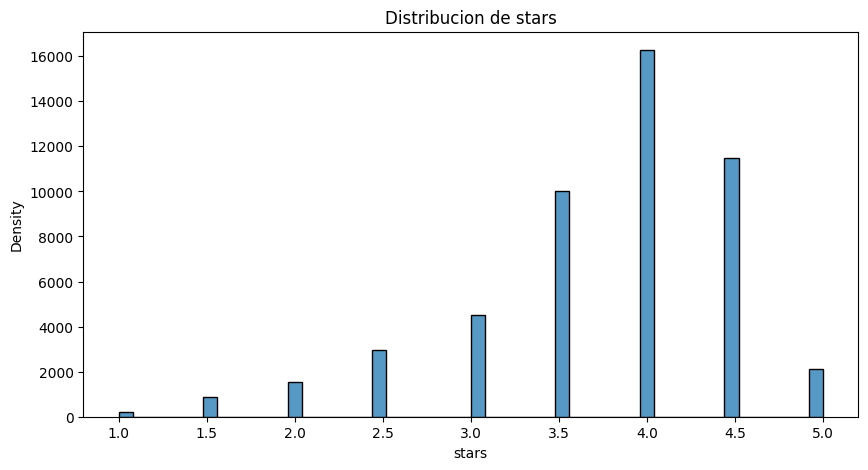

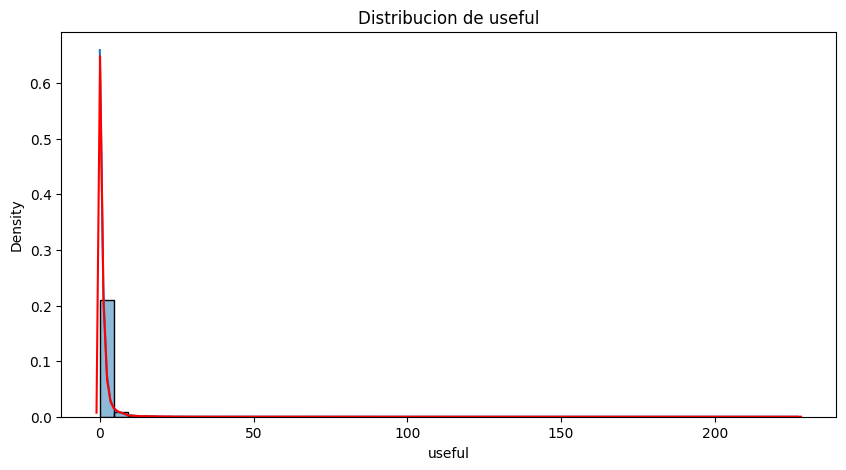

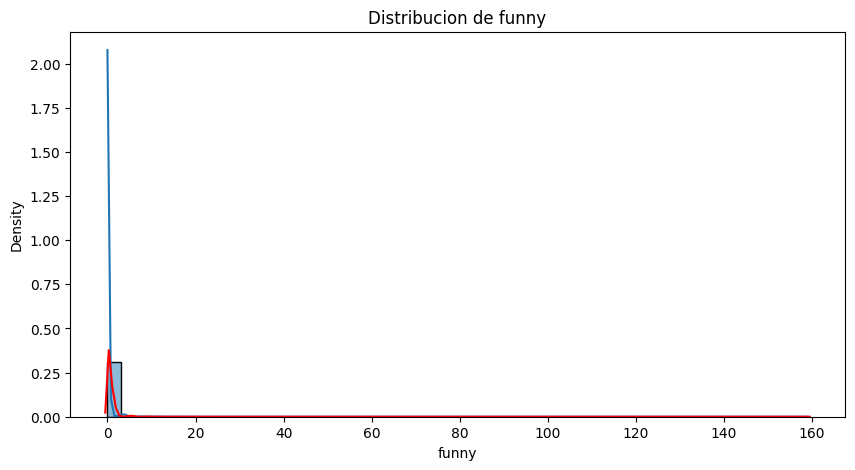

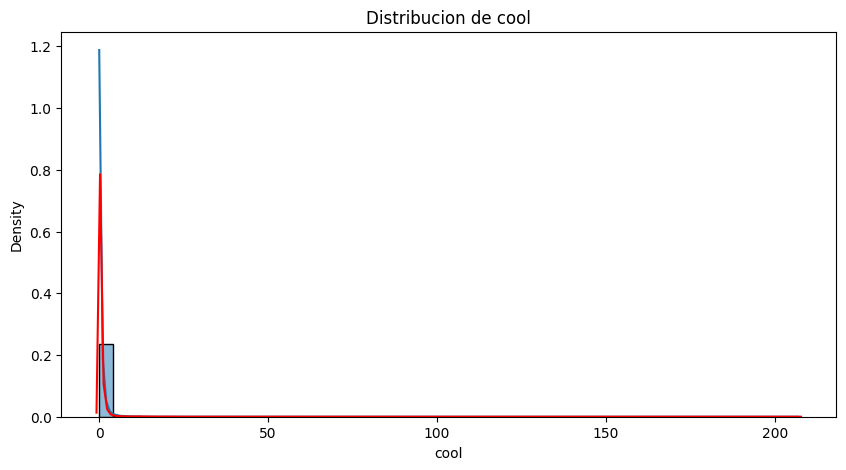

In [14]:
for col in numerical_features:
    plt.figure(figsize=(10, 5))
    plt.title(f'Distribucion de {col}')
    if col == 'stars':
        sns.histplot(df[col], bins=50, kde=False)
    else:
        sns.histplot(df[col], bins=50, kde=True, stat='density')
        sns.kdeplot(df[col], color='red')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.savefig(img_path.joinpath(f'density_{col}_plot.png'))
    plt.show()

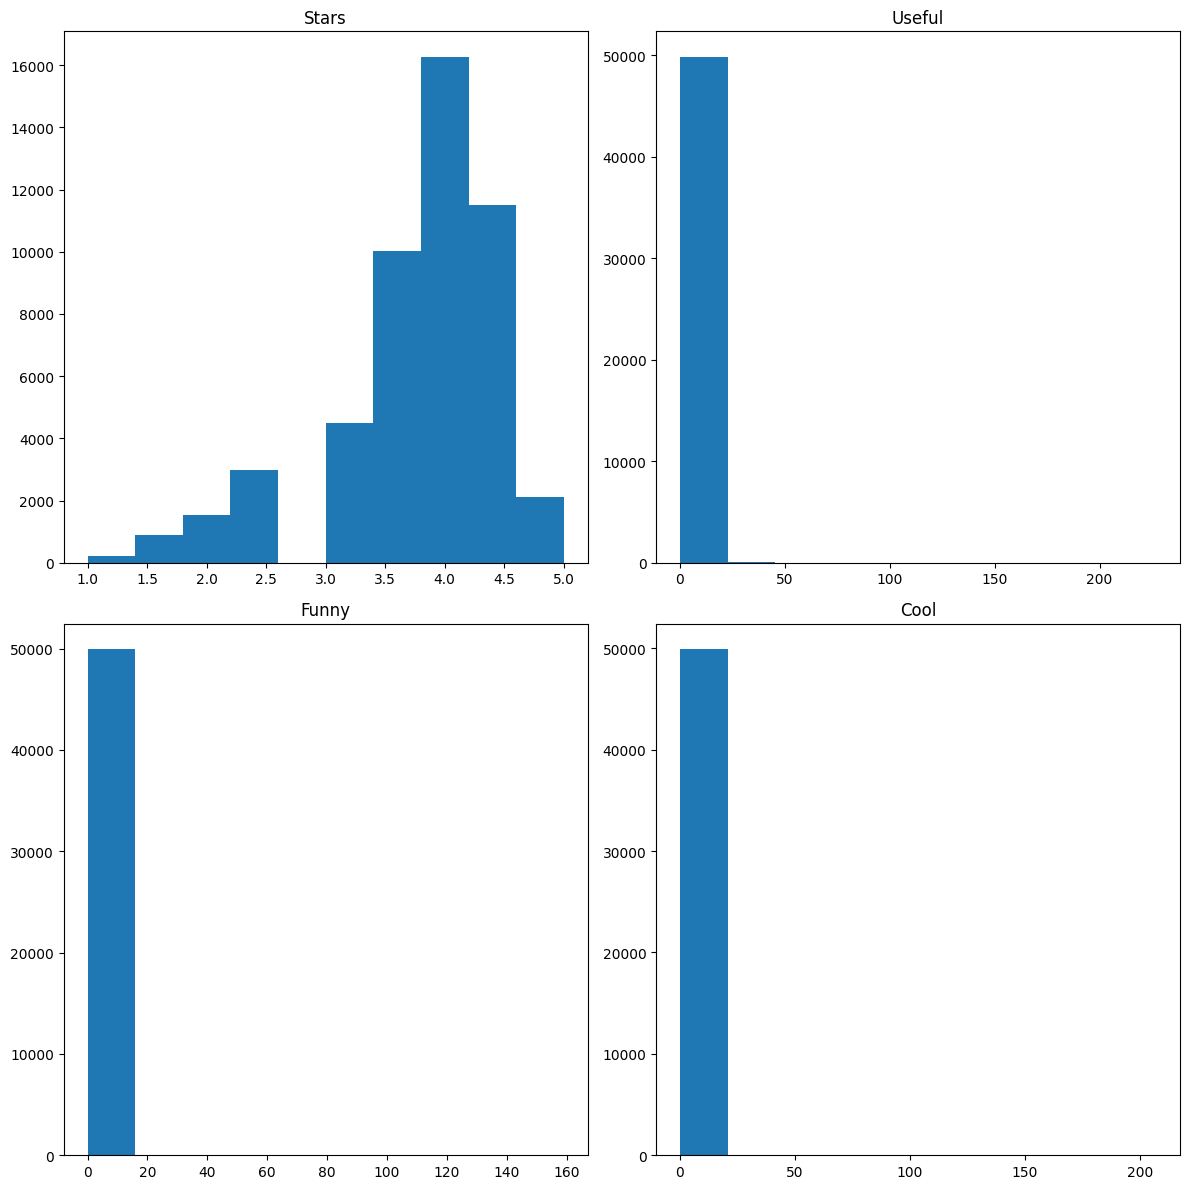

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12), squeeze=False)
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    axes[i].hist(df[feature])
    axes[i].set_title(feature.capitalize())

fig.tight_layout()
plt.savefig(img_path.joinpath('numerical_features_plot.png'))
plt.show()

# Procesamiento de datos textuales

agregar una breve descripcion de como se realizo el procesamiento de los datos textuales.

## Conteo promedio de letras

In [16]:
def count_chars(text):
    words = len(text)
    return words

df['num_chars'] = df['text'].apply(count_chars)

In [17]:
df['num_chars'].describe().round(2)

count    50000.00
mean       530.36
std        505.35
min          1.00
25%        211.00
50%        372.00
75%        661.00
max       5000.00
Name: num_chars, dtype: float64

In [18]:
num_chars_max = df.loc[df['num_chars'].idxmax()]
num_chars_min = df.loc[df['num_chars'].idxmin()]

In [19]:
num_chars_min

review_id      j1Q_NKfZlguBBjEqU9Fh2A
user_id        _L3N3ur_5OC8Zlrsuf7wtQ
business_id    FoYjHEoY1TJU6g4xnq_x_w
stars                             4.0
useful                              0
funny                               0
cool                                0
text                                l
date              2017-07-13 22:34:18
num_chars                           1
Name: 1077721, dtype: object

In [20]:
num_chars_max

review_id                                 BbeW936M1laZhcq5LztQBA
user_id                                   uD6Py10gW2EwDGims3oC1w
business_id                               vEIyiN8vKfWvMXjo628R6g
stars                                                        4.5
useful                                                         0
funny                                                          0
cool                                                           0
text           i've been taking my giant schnauzer to best ca...
date                                         2021-12-18 21:08:30
num_chars                                                   5000
Name: 663006, dtype: object

## Conteo promedio de palabras por reseña

In [21]:
def count_words(text):
  words = text.split()
  return len(words)

df['num_words'] = df['text'].apply(count_words)

In [22]:
df['num_words'].describe().round(2)

count    50000.00
mean        98.12
std         94.33
min          1.00
25%         39.00
50%         69.00
75%        123.00
max        975.00
Name: num_words, dtype: float64

In [23]:
num_words_min = df.loc[df['num_words'].idxmin()]
num_words_max = df.loc[df['num_words'].idxmax()]

In [24]:
num_words_min

review_id      j1Q_NKfZlguBBjEqU9Fh2A
user_id        _L3N3ur_5OC8Zlrsuf7wtQ
business_id    FoYjHEoY1TJU6g4xnq_x_w
stars                             4.0
useful                              0
funny                               0
cool                                0
text                                l
date              2017-07-13 22:34:18
num_chars                           1
num_words                           1
Name: 1077721, dtype: object

In [25]:
num_words_max

review_id                                 8a_a4Yd_CXYJnfuPVSe7gw
user_id                                   IIe6WIrx9ZJBzg7d7sEzSg
business_id                               w9VlHu309rE-35VjKrLK_w
stars                                                        3.0
useful                                                         8
funny                                                          3
cool                                                           1
text           run the opposite direction!\n\nwhat drew me in...
date                                         2019-05-07 20:49:19
num_chars                                                   4968
num_words                                                    975
Name: 913479, dtype: object

## Conteo promedio de palabras por token

In [26]:
text = df.text.to_list()
print(text[0])

amazing food, amazing drinks.  i take all my visitors to datz when they stay with me.


In [27]:
encoding = tiktoken.get_encoding("cl100k_base")

def count_tokens_gpt4(text):
    num_tokens = len(encoding.encode(text))
    return num_tokens

df['num_tokens-gpt4'] = df['text'].apply(count_tokens_gpt4)

In [28]:
df['num_tokens-gpt4'].describe().round(2)

count    50000.00
mean       120.00
std        114.81
min          1.00
25%         48.00
50%         84.00
75%        150.00
max       1246.00
Name: num_tokens-gpt4, dtype: float64

In [29]:
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,num_chars,num_words,num_tokens-gpt4
1091563,i3SXt3vHuP8d0onZOMzl_Q,0_DGYsEgJScJdMxZmfIeuw,QHWYlmVbLC3K6eglWoHVvA,4.0,0,0,0,"amazing food, amazing drinks. i take all my v...",2015-12-16 01:11:52,85,16,22
730295,3uJ1UQ62fxtvPDDMnPX8cQ,zWd19tcdq1e1LBtlRhTG_g,L6HZpnV4UAyPJWxApKjSzg,1.5,0,0,0,i like budget and use them frequently. in fact...,2019-01-08 01:57:53,971,200,230
899003,SnKCBN0ASTEJoXwtt5-sYw,7EjeGRHhDkfGCYXX4qw9Mg,L5LLN0RafiV1Z9cddzvuCw,4.0,2,0,2,"nice atmosphere....service was very good, as w...",2019-08-11 05:40:07,328,54,72
689516,6khW8tBfiXNQ6VhV2_9j2g,-5W5jd4wcX3JqsLVuJ54IQ,ZaVdMS6TIOG1lFTBDpEa5Q,2.5,2,0,0,the service has improved a little but the food...,2016-04-01 21:53:39,167,30,38
465591,g-UjarZoqMjUjnOcb3m7lA,1mMPpNZHBNMiep1ml6KDhw,0CssPu4DgIImkouHXKTY6Q,4.0,2,0,1,this is the second time we've ordered takeout ...,2016-04-02 14:37:05,457,81,100


In [30]:
stop_words = set(stopwords.words('english'))
def count_tokens(text):
    token = WordPunctTokenizer().tokenize(text)
    clean_token=[]
    for tok in token:
        tok = tok.lower()
        new_token = re.sub(r'[^a-zA-Z]+', '', tok)
        if new_token != "" and len(new_token) >= 2:
            vowels=len([v for v in new_token if v in "aeiou"])
            if vowels != 0:
                clean_token.append(new_token)
    return len(clean_token)

df['num_tokens'] = df['text'].apply(count_tokens)

In [31]:
df['num_tokens'].describe().round(2)

count    50000.00
mean        90.53
std         86.61
min          0.00
25%         36.00
50%         63.00
75%        113.00
max        881.00
Name: num_tokens, dtype: float64

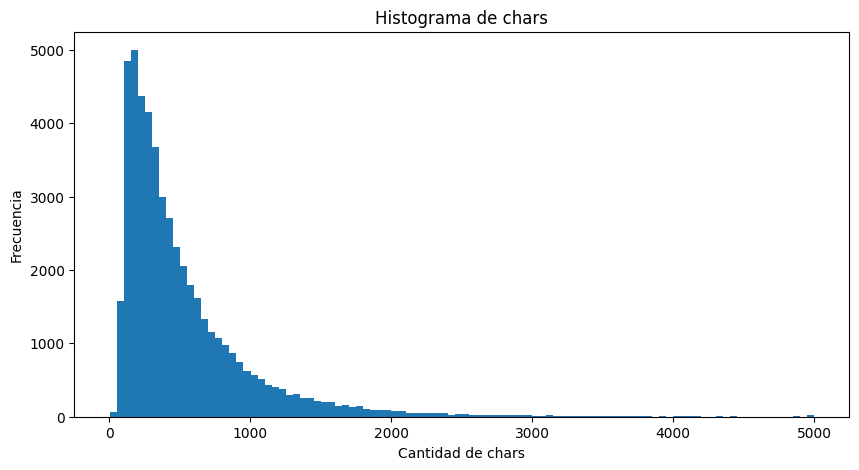

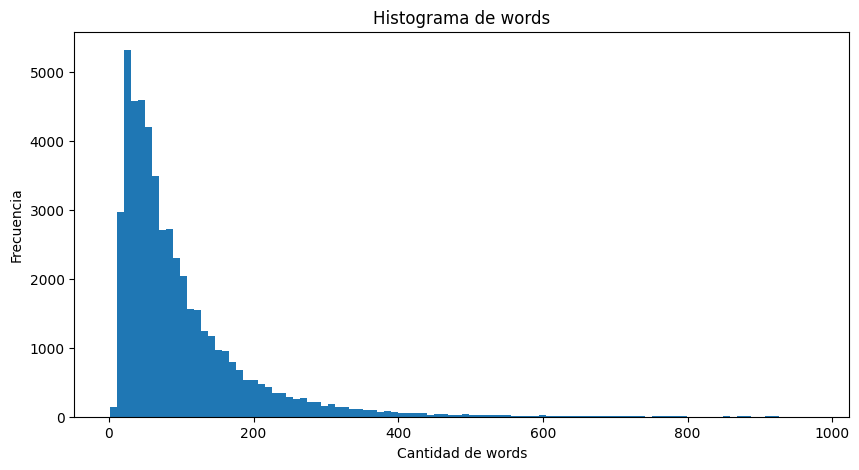

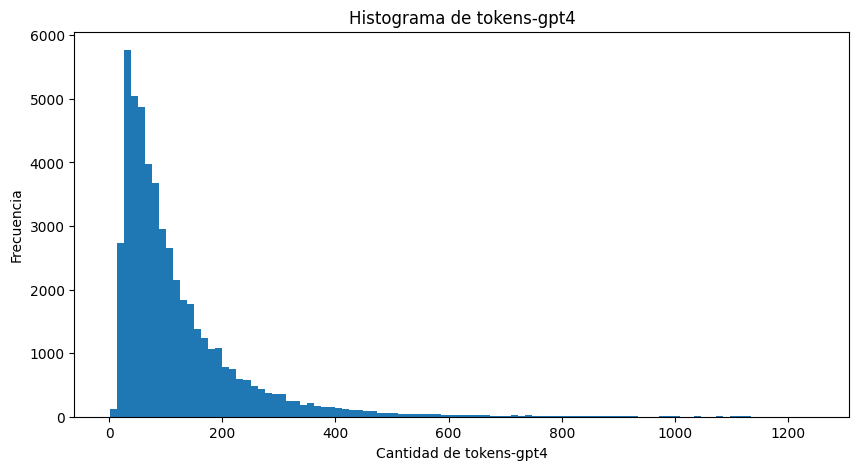

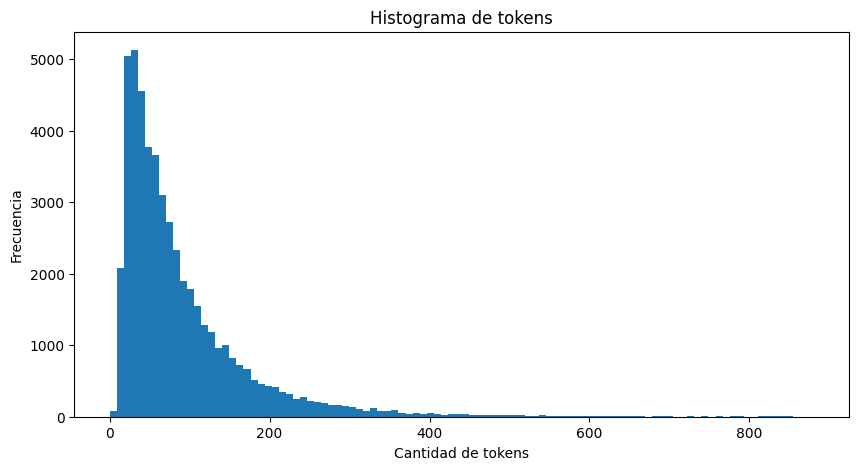

In [32]:
for col in df.columns[9:]:
    name = col.split('_')[1]
    plt.figure(figsize=(10, 5))
    plt.hist(df[col], bins=100)
    plt.title(f'Histograma de {name}')
    plt.xlabel(f'Cantidad de {name}')
    plt.ylabel('Frecuencia')
    plt.savefig(img_path.joinpath(f'hist_{name}_plot.png'))
    plt.show()

## cuando empezo YELP a funcionar? este dato es de wikipedia

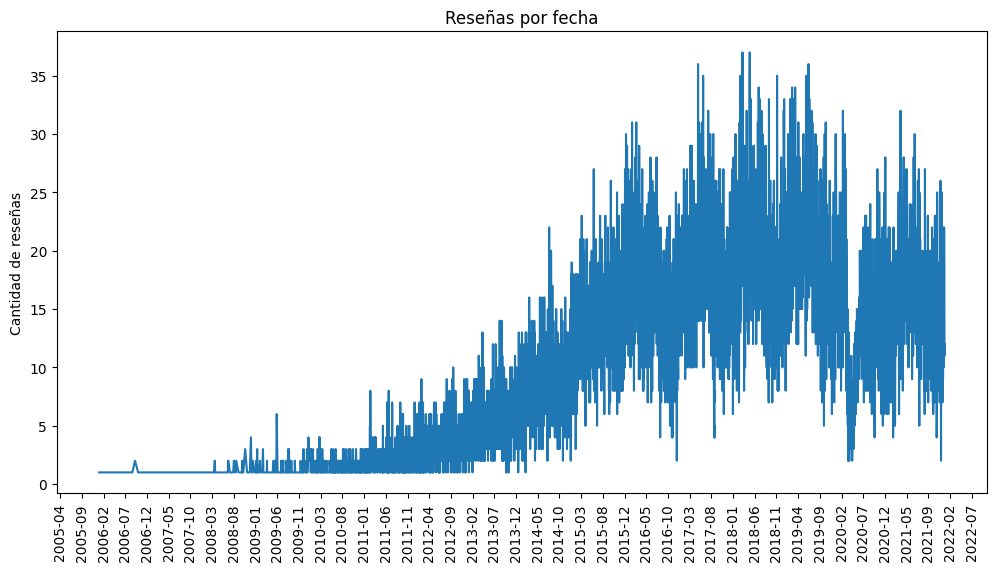

In [33]:
df['date'] = pd.to_datetime(df['date'])

grouped = df.groupby(df['date'].dt.date).count()['review_id']

plt.figure(figsize=(12, 6))
plt.plot(grouped.index, grouped.values)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=150))

plt.title("Reseñas por fecha")
plt.ylabel("Cantidad de reseñas")
plt.xticks(rotation=90)
plt.savefig(img_path.joinpath('reviews_by_date_plot.png'))
plt.show()

## Bag of words

In [34]:
punc = string.punctuation
stop_words = set(stopwords.words('english'))
lem = WordNetLemmatizer()

In [35]:
def clean_text(text):
    text = text.lower()
    text = ''.join([c for c in text if c not in punc])
    text = [lem.lemmatize(w) for w in text.split() if w not in stop_words]
    return text

df['clean_text'] = df['text'].apply(clean_text)

In [36]:
corpus = df['clean_text'].to_list()
corpus1 = [' '.join(text) for text in corpus]

In [37]:
vectorizer = CountVectorizer(stop_words = 'english')
X = vectorizer.fit_transform(corpus1)

In [38]:
list=vectorizer.get_feature_names_out()
list = list.tolist()

In [39]:
clean_corpus=[]
for tok in list:
    # 1. se convierten todos los caracteres alfabéticos a minúsculas
    tok = tok.lower()
    # 2. se elimia cualquier caracter que no sea alfabético (números, puntuaciones, etc)
    new_list = re.sub(r'[^a-zA-Z]+', '', tok)
    # 3. Finalmente, se eliminan aquellos lists que correspondan a espacios.
    if new_list != "" and len(new_list) >= 2:
        vowels=len([v for v in new_list if v in "aeiou"])
        if vowels != 0: # se remueven aquellos lists que no contienen vocales
            clean_corpus.append(new_list)
print(f"Después de eliminar palabras con RegEx: {len(clean_corpus)}")

Después de eliminar palabras con RegEx: 54964


In [40]:
print("El tamaño del vocabulario es: ", len(clean_corpus))
print("Las primeras 10 palabras del vocabulario son: ", clean_corpus[:10])

El tamaño del vocabulario es:  54964
Las primeras 10 palabras del vocabulario son:  ['oz', 'am', 'meters', 'score', 'still', 'bottle', 'head', 'ish', 'month', 'percent']


In [41]:
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,num_chars,num_words,num_tokens-gpt4,num_tokens,clean_text
1091563,i3SXt3vHuP8d0onZOMzl_Q,0_DGYsEgJScJdMxZmfIeuw,QHWYlmVbLC3K6eglWoHVvA,4.0,0,0,0,"amazing food, amazing drinks. i take all my v...",2015-12-16 01:11:52,85,16,22,14,"[amazing, food, amazing, drink, take, visitor,..."
730295,3uJ1UQ62fxtvPDDMnPX8cQ,zWd19tcdq1e1LBtlRhTG_g,L6HZpnV4UAyPJWxApKjSzg,1.5,0,0,0,i like budget and use them frequently. in fact...,2019-01-08 01:57:53,971,200,230,175,"[like, budget, use, frequently, fact, im, sitt..."
899003,SnKCBN0ASTEJoXwtt5-sYw,7EjeGRHhDkfGCYXX4qw9Mg,L5LLN0RafiV1Z9cddzvuCw,4.0,2,0,2,"nice atmosphere....service was very good, as w...",2019-08-11 05:40:07,328,54,72,50,"[nice, atmosphereservice, good, food, particul..."
689516,6khW8tBfiXNQ6VhV2_9j2g,-5W5jd4wcX3JqsLVuJ54IQ,ZaVdMS6TIOG1lFTBDpEa5Q,2.5,2,0,0,the service has improved a little but the food...,2016-04-01 21:53:39,167,30,38,31,"[service, improved, little, food, samegreasy, ..."
465591,g-UjarZoqMjUjnOcb3m7lA,1mMPpNZHBNMiep1ml6KDhw,0CssPu4DgIImkouHXKTY6Q,4.0,2,0,1,this is the second time we've ordered takeout ...,2016-04-02 14:37:05,457,81,100,81,"[second, time, weve, ordered, takeout, tonys, ..."


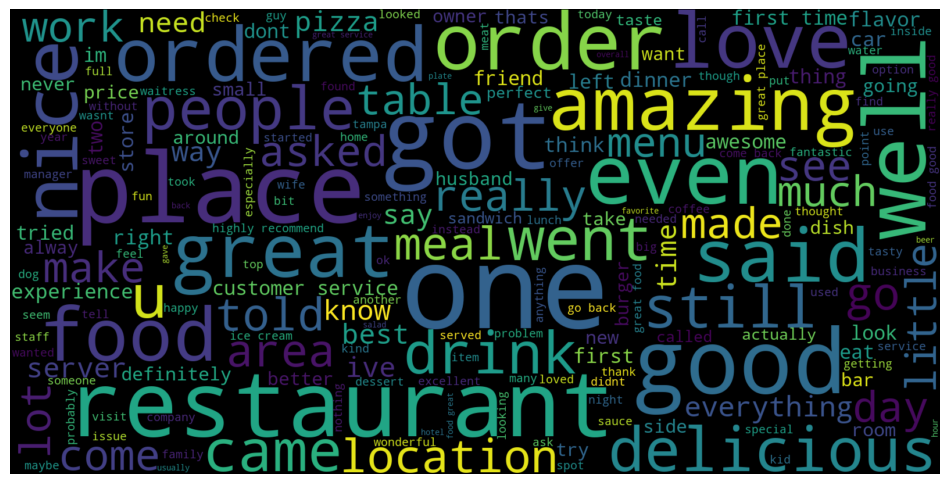

In [42]:
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(str(corpus1))

# Visualizar la nube de palabras
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig(img_path.joinpath('wordcloud_plot.png'))
plt.show()

In [43]:
df['clean_text_corpus']=corpus1

In [44]:
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,num_chars,num_words,num_tokens-gpt4,num_tokens,clean_text,clean_text_corpus
1091563,i3SXt3vHuP8d0onZOMzl_Q,0_DGYsEgJScJdMxZmfIeuw,QHWYlmVbLC3K6eglWoHVvA,4.0,0,0,0,"amazing food, amazing drinks. i take all my v...",2015-12-16 01:11:52,85,16,22,14,"[amazing, food, amazing, drink, take, visitor,...",amazing food amazing drink take visitor datz stay
730295,3uJ1UQ62fxtvPDDMnPX8cQ,zWd19tcdq1e1LBtlRhTG_g,L6HZpnV4UAyPJWxApKjSzg,1.5,0,0,0,i like budget and use them frequently. in fact...,2019-01-08 01:57:53,971,200,230,175,"[like, budget, use, frequently, fact, im, sitt...",like budget use frequently fact im sitting car...
899003,SnKCBN0ASTEJoXwtt5-sYw,7EjeGRHhDkfGCYXX4qw9Mg,L5LLN0RafiV1Z9cddzvuCw,4.0,2,0,2,"nice atmosphere....service was very good, as w...",2019-08-11 05:40:07,328,54,72,50,"[nice, atmosphereservice, good, food, particul...",nice atmosphereservice good food particularly ...
689516,6khW8tBfiXNQ6VhV2_9j2g,-5W5jd4wcX3JqsLVuJ54IQ,ZaVdMS6TIOG1lFTBDpEa5Q,2.5,2,0,0,the service has improved a little but the food...,2016-04-01 21:53:39,167,30,38,31,"[service, improved, little, food, samegreasy, ...",service improved little food samegreasy hard e...
465591,g-UjarZoqMjUjnOcb3m7lA,1mMPpNZHBNMiep1ml6KDhw,0CssPu4DgIImkouHXKTY6Q,4.0,2,0,1,this is the second time we've ordered takeout ...,2016-04-02 14:37:05,457,81,100,81,"[second, time, weve, ordered, takeout, tonys, ...",second time weve ordered takeout tonys pizza t...


In [45]:
from textblob import TextBlob
from sklearn.metrics import adjusted_rand_score

In [46]:
df['polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)


In [47]:
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,num_chars,num_words,num_tokens-gpt4,num_tokens,clean_text,clean_text_corpus,polarity,subjectivity
1091563,i3SXt3vHuP8d0onZOMzl_Q,0_DGYsEgJScJdMxZmfIeuw,QHWYlmVbLC3K6eglWoHVvA,4.0,0,0,0,"amazing food, amazing drinks. i take all my v...",2015-12-16 01:11:52,85,16,22,14,"[amazing, food, amazing, drink, take, visitor,...",amazing food amazing drink take visitor datz stay,0.600000,0.900000
730295,3uJ1UQ62fxtvPDDMnPX8cQ,zWd19tcdq1e1LBtlRhTG_g,L6HZpnV4UAyPJWxApKjSzg,1.5,0,0,0,i like budget and use them frequently. in fact...,2019-01-08 01:57:53,971,200,230,175,"[like, budget, use, frequently, fact, im, sitt...",like budget use frequently fact im sitting car...,0.020746,0.448535
899003,SnKCBN0ASTEJoXwtt5-sYw,7EjeGRHhDkfGCYXX4qw9Mg,L5LLN0RafiV1Z9cddzvuCw,4.0,2,0,2,"nice atmosphere....service was very good, as w...",2019-08-11 05:40:07,328,54,72,50,"[nice, atmosphereservice, good, food, particul...",nice atmosphereservice good food particularly ...,0.279250,0.690000
689516,6khW8tBfiXNQ6VhV2_9j2g,-5W5jd4wcX3JqsLVuJ54IQ,ZaVdMS6TIOG1lFTBDpEa5Q,2.5,2,0,0,the service has improved a little but the food...,2016-04-01 21:53:39,167,30,38,31,"[service, improved, little, food, samegreasy, ...",service improved little food samegreasy hard e...,-0.119792,0.308333
465591,g-UjarZoqMjUjnOcb3m7lA,1mMPpNZHBNMiep1ml6KDhw,0CssPu4DgIImkouHXKTY6Q,4.0,2,0,1,this is the second time we've ordered takeout ...,2016-04-02 14:37:05,457,81,100,81,"[second, time, weve, ordered, takeout, tonys, ...",second time weve ordered takeout tonys pizza t...,0.407143,0.578571


In [48]:
# Clusterización DBSCAN
X=df[['polarity','subjectivity','stars','useful','funny','cool']]
# Clusterización DBSCAN
dbscan = DBSCAN(eps=0.05, min_samples=12)
clusters = dbscan.fit_predict(X)

In [49]:
# Clusterización DBSCAN con diferentes parámetros
dbscan1 = DBSCAN(eps=0.2, min_samples=12)
clusters1 = dbscan1.fit_predict(X)

# Construcción del modelo - DBSCAN


In [50]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    # Convertir X a un numpy array si es necesario
    if isinstance(X, pd.DataFrame):
        X = X.values

    cores = X[core_mask]
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1], c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)



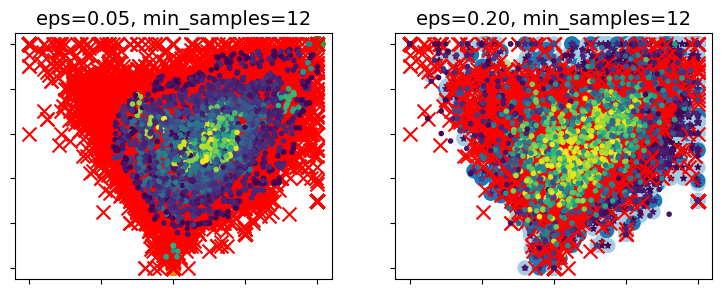

In [51]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100, show_ylabels=False, show_xlabels=False)

plt.subplot(122)
plot_dbscan(dbscan1, X, size=100, show_ylabels=False, show_xlabels=False)

plt.show()


In [52]:
df['polarity'].describe().round(3)

count    50000.000
mean         0.253
std          0.247
min         -1.000
25%          0.107
50%          0.261
75%          0.407
max          1.000
Name: polarity, dtype: float64

In [53]:
polarity = df.loc[df['polarity'].idxmin()]

In [54]:
polarity[7]

"came for beef lomein then i got couple flakes of ground beef and watery noodle that doesn't have any flavor. stay away from this place . it's 10$ for nasty over priced noodle. it's a rip off. i could go to the market and buy me a bag for 6$ and do it myself"